In [11]:
valid_codes = '''AUS,AUT,BEL,BGR,HRV,CHL,CZE,DNK,GBR,EST,FIN,FRA,DEU,GRC,HUN,ISL,ISR,ITA,LVA,LTU,LUX,NLD,NZL,NOR,POL,PRT,KOR,RUS,SVN,SVK,ESP,CHE,SWE,TWN,USA'''.split(",")

In [13]:
#these are the countries we have ex_mort data for from country codes text file
#thank you Alex
print(valid_codes)

['AUS', 'AUT', 'BEL', 'BGR', 'HRV', 'CHL', 'CZE', 'DNK', 'GBR', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'ISR', 'ITA', 'LVA', 'LTU', 'LUX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'KOR', 'RUS', 'SVN', 'SVK', 'ESP', 'CHE', 'SWE', 'TWN', 'USA']


In [94]:
import pandas as pd
ex_mort = pd.read_csv("clean_combined.csv")
safety = pd.read_csv("covid-stringency-index.csv")

In [95]:
#only use countries that we have ex_mort data for
safety = safety[safety["Code"].isin(valid_codes)]

In [96]:
#only use weeks from the pandemic
ex_mort = ex_mort[ex_mort["years_relative"] >=0]

In [97]:
import numpy as np

#convert to datetime to grab week number and year
safety["Day"] =  pd.to_datetime(safety["Day"])

In [98]:
safety["week"] = safety["Day"].dt.week
safety['year'] = safety["Day"].dt.year


In [99]:
si_df = safety.groupby(["Code", "week", "year"])["stringency_index"].mean().reset_index()
si_df = si_df.rename(columns={"Code": "country"})
si_df.head(10)

,country,week,year,stringency_index
0,AUS,1,2021,70.830000
1,AUS,1,2022,43.451429
2,AUS,2,2021,55.090000
3,AUS,2,2022,44.244286
4,AUS,3,2021,55.090000
5,AUS,3,2022,64.221429
6,AUS,4,2020,1.853333
7,AUS,4,2021,57.338571
8,AUS,4,2022,64.680000
9,AUS,5,2020,7.940000


In [109]:
#put the stringency index averages per week into the rest of the data
df = pd.merge(ex_mort, si_df)
df.head(10)

,date,country,week,year,DTotal,mov_avg,years_relative,pred_deaths,excess_mortality,em_per_capita,...,new_cases,total_deaths,new_deaths,total_cases_per_million,hosp_patients,population,mov_avg_cases,new_cases_per_capita,normalized_cases,stringency_index
0,2020-02-02,CHL,4,2020,1964.0,2006.714286,0,1875.178571,131.535714,6.846410e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2020-02-02,SWE,4,2020,1730.0,1791.000000,0,1861.609774,-70.609774,-6.949672e-06,...,1.0,NaN,0.0,0.098,NaN,10160159.0,1.0,9.842366e-08,3.057224e-06,0.0
2,2020-02-02,ESP,4,2020,9954.0,9006.428571,0,9470.538910,-464.110338,-8.516927e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2020-02-02,DNK,4,2020,1033.0,1079.714286,0,1063.016484,16.697802,1.990192e-07,...,10.0,NaN,0.0,0.012,NaN,83900471.0,10.0,1.191888e-07,3.702230e-06,0.0
4,2020-02-02,LVA,4,2020,555.0,572.000000,0,555.143985,16.856015,1.814230e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,2020-02-02,GRC,4,2020,2774.0,2668.285714,0,2680.928571,-12.642857,-1.853598e-07,...,2.0,NaN,0.0,0.029,NaN,68207114.0,2.0,2.932245e-08,9.108106e-07,0.0
6,2020-02-02,BEL,4,2020,2204.0,2263.142857,0,2273.806015,-10.663158,-9.166826e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,2020-02-02,LUX,4,2020,86.0,84.571429,0,84.822932,-0.251504,-4.902112e-09,...,12.0,NaN,0.0,0.078,NaN,51305184.0,7.0,1.364385e-07,4.238035e-06,0.0
8,2020-02-02,KOR,4,2020,6490.0,6244.000000,0,6382.580952,-138.580952,-2.703333e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,2020-02-02,HUN,4,2020,2723.0,2580.000000,0,2673.120301,-93.120301,-8.979131e-06,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0


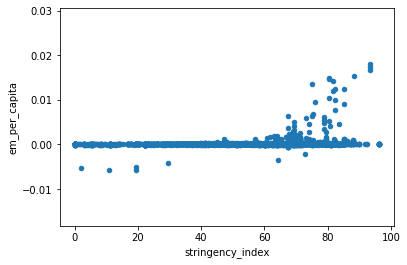

In [111]:
df.plot.scatter("stringency_index", "em_per_capita")

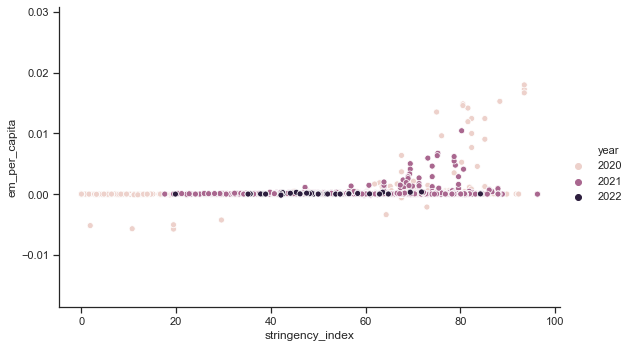

In [115]:
import seaborn
import matplotlib.pyplot as plt
seaborn.set(style='ticks')
seaborn.relplot(data=df, x='stringency_index', y='em_per_capita', hue='year',  aspect=1.61)
plt.show()